# DPCRO_SL Guide

In [34]:
import sys
sys.path.insert(0, "..")

from CRO_SL import *
from AbsObjetiveFunc import *
from SubstrateReal import *

The first step will be to define the objetive function that will be optimized, this will be done taking as a base the class AbsObjetiveFunc.
In this case, we will optimize a very simple function, simply adding the squared components of the vector. 

In [35]:

"""
All the following methods will have to be implemented for the algorithm to work properly
with the same inputs, except for the constructor 
"""
class SumSquare(AbsObjetiveFunc):
    """
    This is the constructor of the class, here is where the objetive function can be setted up.
    In this case we will only add the size of the vector as a parameter.
    """
    def __init__(self, size):
        self.size = size
        self.opt = "min" # it can be "max" or "min"

        # we call the constructor of the superclass with the size of the vector
        # and wether we want to maximize or minimize the function 
        super().__init__(self.size, self.opt)
    
    """
    This will be the objetive function, that will recieve a vector and output a number
    """
    def objetive(self, solution):
        return (solution**2).sum()
    
    """
    This will be the function used to generate random vectorsfor the initializatio of the algorithm
    """
    def random_solution(self):
        return 200*np.random.random(self.size)-100
    
    """
    This will be the function that will repair solutions, or in other words, makes a solution
    outside the domain of the function into a valid one.
    If this is not needed simply return "solution"
    """
    def check_bounds(self, solution):
        return np.clip(solution, -100, 100)

In [36]:
objfunc = SumSquare(30)

Now that we have our objetive function, we can proceed to initialize the optimization algorithm.

First, we configure the hyperparameters of the algorithm in a dictionary, a detailed list of the parameters needed can be found on the README.md file. Here we use a configuration that should work ok in most cases.

In [37]:
params = {
    "popSize": 100,
    "rho": 0.6,
    "Fb": 0.98,
    "Fd": 0.2,
    "Pd": 0.8,
    "k": 3,
    "K": 20,
    "group_subs": True,

    "stop_cond": "neval",
    "time_limit": 4000.0,
    "Ngen": 10000,
    "Neval": 3e5,
    "fit_target": 1000,

    "verbose": True,
    "v_timer": 1,

    "dynamic": True,
    "dyn_method": "success",
    "dyn_metric": "avg",
    "dyn_steps": 10,
    "prob_amp": 0.01
}

Since this algorithm relies on the mixing of different mutation and recombination operators, we will create the list of operators to be used. To create an operator we create an instance of the class SubstrateReal in case we are working with real valued vectors, and SubstrateInt if we are working with discrete valued vectors.

Each operator has it's own parameters that will be specified in the creation of the operator

In [38]:
operators = [
    SubstrateReal("DE/rand/1", {"F": 0.7, "Cr":0.8}),
    SubstrateReal("DE/best/2", {"F": 0.7, "Cr":0.8}),
    SubstrateReal("DE/current-to-best/1", {"F": 0.7, "Cr":0.8}),
    SubstrateReal("DE/current-to-rand/1", {"F": 0.7, "Cr":0.8})
]

Now we simply create an instance of the CRO_SL algorithm with the previous data. 

In [39]:
cro_alg = CRO_SL(objfunc, operators, params)

And we call the optimize function to find a suitable solution. This function will return the best solution along with its value in the objetive function 

In [40]:
solution, obj_value = cro_alg.optimize()

Time Spent 1.0s:
	Generation: 348
	Best fitness: 1.3868344158241474e-08
	Evaluations of fitness: 28539
	Substrate probability:
		DE/rand/1:           0.024548
		DE/best/2:           0.024548
		DE/current-to-best/1:0.945878
		DE/current-to-rand/1:0.005027

Time Spent 2.0s:
	Generation: 722
	Best fitness: 2.924560844557328e-11
	Evaluations of fitness: 59481
	Substrate probability:
		DE/rand/1:           0.190075
		DE/best/2:           0.754811
		DE/current-to-best/1:0.005404
		DE/current-to-rand/1:0.04971

Time Spent 3.0s:
	Generation: 1063
	Best fitness: 8.847224407196247e-23
	Evaluations of fitness: 87351
	Substrate probability:
		DE/rand/1:           0.004902
		DE/best/2:           0.004902
		DE/current-to-best/1:0.985268
		DE/current-to-rand/1:0.004928

Time Spent 4.01s:
	Generation: 1436
	Best fitness: 1.3874112613510416e-25
	Evaluations of fitness: 118203
	Substrate probability:
		DE/rand/1:           0.218877
		DE/best/2:           0.761222
		DE/current-to-best/1:0.005006
		DE/cur

In [41]:
solution

array([ 9.88814333e-33,  3.48935581e-31, -1.32800875e-31, -3.23832609e-31,
        1.56920183e-31, -1.00887007e-31,  4.65943864e-31,  7.40743780e-32,
       -3.48542451e-32,  5.52892865e-31,  4.16121538e-31,  3.77336655e-31,
        3.32998142e-31,  6.63118855e-31, -3.39547049e-31,  6.17769142e-32,
        4.97025390e-32, -6.28316591e-32, -2.21680662e-31, -7.68166865e-32,
        4.83922234e-32, -5.26963774e-31,  3.08899120e-31, -1.36658434e-32,
        1.80798533e-31, -2.83976712e-32,  5.10641763e-33,  4.01828091e-31,
        3.51569822e-32,  2.02768364e-31])

In [43]:
obj_value

2.4683554408987598e-60

We will also be able to visualize the progress curve and the probability assiciated to each operator in each step, this will be done with the display_report method.

Number of generations: 3646
Real time spent: 9.71928s
CPU time spent: 9.92856s
Number of fitness evaluations: 300055
	Substrate probability:
		DE/rand/1:           0.374235
		DE/best/2:           0.615904
		DE/current-to-best/1:0.004959
		DE/current-to-rand/1:0.004902
Best fitness: 2.4683554408987598e-60


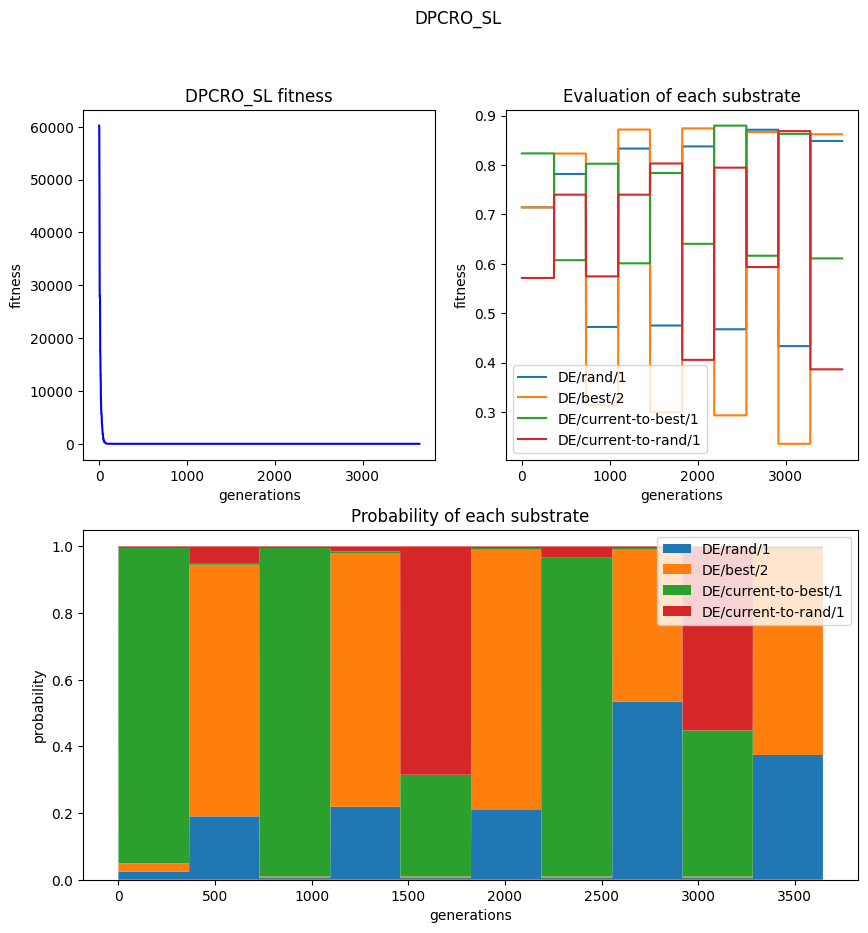

In [44]:
cro_alg.display_report()

If we want to store a solution into a file, we will be able to do so with the save_soluition method. It will save the vector and it's associated objetive function value in a .csv file.

In [45]:
cro_alg.save_solution("example.csv")